In [93]:
words = open("names.txt").read().splitlines()

In [94]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [95]:
len(words)

32033

In [96]:
min(len(w) for w in words), max(len(w) for w in words)

(2, 15)

In [97]:
b = {}
for w in words: 
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        bigram = (ch1, ch2)
        b[bigram] = b.get(bigram, 0) + 1

In [98]:
sorted(b.items(), key=lambda kv: -kv[1])[:10]

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963)]

In [99]:
import torch

In [100]:
N = torch.zeros((28, 28), dtype=torch.int32)

In [101]:
chars = sorted(list(set("".join(words))))
stoi = {s:i for i, s in enumerate(chars)}
stoi["<S>"], stoi["<E>"] = 26, 27
itos = {i:s for s, i in stoi.items()}

In [102]:
for w in words:
    chs = ["<S>"] + list(w) + ["<E>"]
    for ch1, ch2 in zip(chs, chs[1:]):
        N[stoi[ch1], stoi[ch2]] += 1

(-0.5, 27.5, 27.5, -0.5)

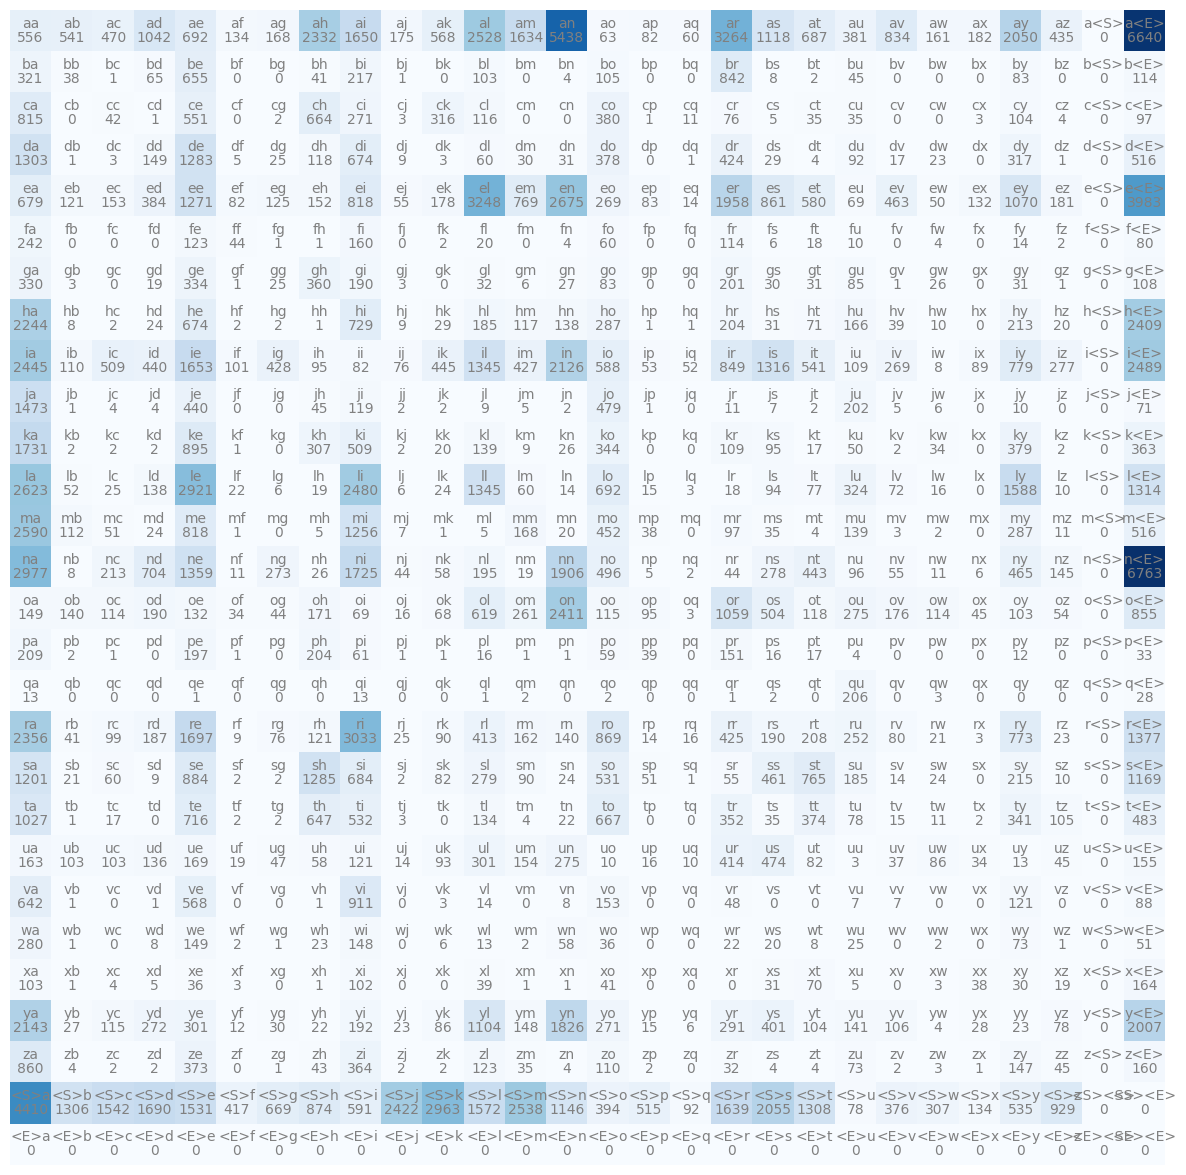

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 16))
plt.imshow(N, cmap="Blues")
for y in range(28):
    for x in range(28):
        plt.text(x, y, itos[y] + itos[x], ha="center", va="bottom", color="gray")
        plt.text(x, y, N[y, x].item(), ha="center", va="top", color="gray")
plt.axis("off")